In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X= 2 * np.random.rand(100,1)
y= 4+3*X+np.random.randn(100,1)

In [2]:
theta=np.random.randn(2,1)
X_=np.c_[np.ones((100,2)),X]
def hypothesis(X,theta):
    return X.dot(theta)
def compute_cost(X,y,theta):
    m=len(y)
    predictions=hypothesis(X,theta)
    cost=(1/(2*m))*np.sum((predictions-y)**2)
    return cost


In [3]:
def gradient_descent(X,y,theta,learning_rate,iterations):
    m=len(y)
    cost_history=[]
    for i in range (iterations):
        predictions=hypothesis(X,theta)
        gradients=(1/m)*X.T.dot(predictions-y)
        theta=theta-learning_rate*gradients
        cost=compute_cost(X,y,theta)
        cost_history.append(cost)

        if i%100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return theta, cost_history



In [14]:
theta = np.zeros((X.shape[1],1))
learning_rate=0.01
iterations=1000
theta , cost_history=gradient_descent(X,y,theta,learning_rate,iterations)
print(f"Final theta values:\n{theta}")

Iteration 0: Cost = 24.4623
Iteration 100: Cost = 4.7196
Iteration 200: Cost = 3.0743
Iteration 300: Cost = 2.9372
Iteration 400: Cost = 2.9258
Iteration 500: Cost = 2.9248
Iteration 600: Cost = 2.9247
Iteration 700: Cost = 2.9247
Iteration 800: Cost = 2.9247
Iteration 900: Cost = 2.9247
Final theta values:
[[5.98025149]]


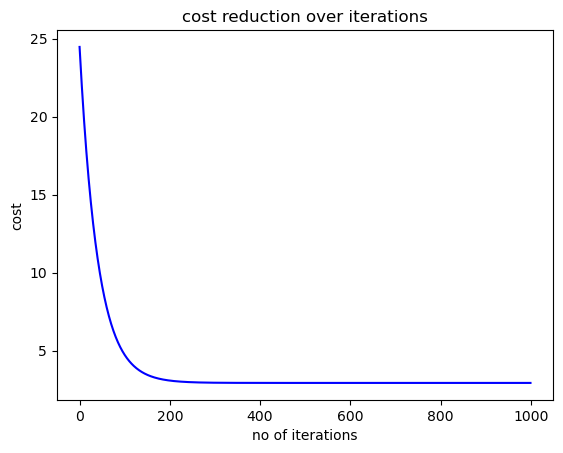

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title('cost reduction over iterations')
plt.xlabel('no of iterations')
plt.ylabel('cost')
plt.show()

In [16]:
def predict(X, theta):
    return np.dot(X, theta)
predictions = predict(X, theta)
print("Predictions:\n", predictions)

Predictions:
 [[ 4.47968821]
 [11.3710213 ]
 [ 8.75501573]
 [ 7.16025659]
 [ 1.86606142]
 [ 1.86577293]
 [ 0.69470922]
 [10.35990238]
 [ 7.18963789]
 [ 8.46890418]
 [ 0.24620091]
 [11.60060968]
 [ 9.95643269]
 [ 2.53968257]
 [ 2.17471806]
 [ 2.19361019]
 [ 3.63889026]
 [ 6.27635087]
 [ 5.16627969]
 [ 3.483247  ]
 [ 7.31806838]
 [ 1.66841674]
 [ 3.49419694]
 [ 4.38187192]
 [ 5.45482641]
 [ 9.39109943]
 [ 2.38819887]
 [ 6.15050254]
 [ 7.08557622]
 [ 0.5555703 ]
 [ 7.26654202]
 [ 2.03955429]
 [ 0.77804977]
 [11.3491483 ]
 [11.54944482]
 [ 9.6688389 ]
 [ 3.6433339 ]
 [ 1.16820761]
 [ 8.18377116]
 [ 5.26444522]
 [ 1.45963867]
 [ 5.92256491]
 [ 0.41130401]
 [10.87592939]
 [ 3.09513874]
 [ 7.92409976]
 [ 3.72822126]
 [ 6.22027512]
 [ 6.53892993]
 [ 2.21095227]
 [11.59671984]
 [ 9.27097845]
 [11.2368799 ]
 [10.7025852 ]
 [ 7.15118448]
 [11.02607954]
 [ 1.05841484]
 [ 2.34405361]
 [ 0.54094112]
 [ 3.89111439]
 [ 4.64877588]
 [ 3.24547091]
 [ 9.91211745]
 [ 4.26694923]
 [ 3.36011804]
 [ 6.490918

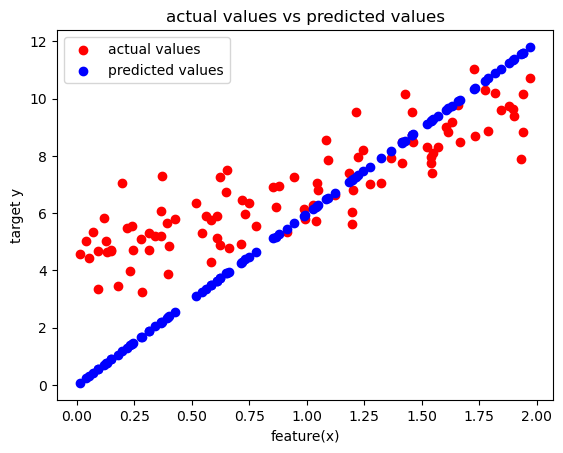

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],y,color='red',label='actual values')
plt.scatter(X[:,0],predictions,color='blue',label='predicted values')
plt.xlabel('feature(x)')
plt.ylabel('target y')
plt.title('actual values vs predicted values')
plt.legend()
plt.show()


In [21]:
# Add bias term (column of ones) to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Shape becomes (100, 2)

# Initialize theta values
theta = np.random.randn(2, 1)  # Shape (2, 1)

# Perform gradient descent
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Predict using the final theta values
predictions = X_b.dot(theta)

# Calculate MSE and R² Score
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Iteration 0: Cost = 28.8603
Iteration 100: Cost = 19.3793
Iteration 200: Cost = 13.1036
Iteration 300: Cost = 8.9480
Iteration 400: Cost = 6.1947
Iteration 500: Cost = 4.3691
Iteration 600: Cost = 3.1572
Iteration 700: Cost = 2.3513
Iteration 800: Cost = 1.8140
Iteration 900: Cost = 1.4546
Iteration 1000: Cost = 1.2130
Iteration 1100: Cost = 1.0493
Iteration 1200: Cost = 0.9374
Iteration 1300: Cost = 0.8598
Iteration 1400: Cost = 0.8051
Iteration 1500: Cost = 0.7655
Iteration 1600: Cost = 0.7361
Iteration 1700: Cost = 0.7136
Iteration 1800: Cost = 0.6957
Iteration 1900: Cost = 0.6809
Mean Squared Error: 1.3369337430615098
R² Score: 0.6175652228529379


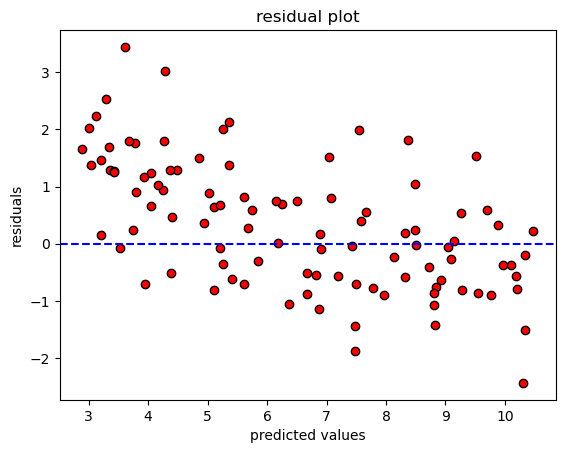

In [22]:
import matplotlib.pyplot as plt
residuals=y-predictions
plt.scatter(predictions,residuals,color='red',edgecolors=(0,0,0))
plt.axhline(y=0,color='blue',linestyle='--')
plt.title('residual plot')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show()

In [23]:
import joblib

# Save the model to a file
joblib.dump(theta, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'")


Model saved as 'linear_regression_model.pkl'


In [25]:
# Load the saved model
theta_loaded = joblib.load('linear_regression_model.pkl')

# Add the bias term to X
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Make predictions using the loaded model
predictions_loaded = X_with_bias.dot(theta_loaded)

# Print the predictions to verify
print("Predictions from the loaded model:\n", predictions_loaded[:10])


Predictions from the loaded model:
 [[ 5.74542829]
 [10.195312  ]
 [ 8.50610029]
 [ 7.47632961]
 [ 4.05775261]
 [ 4.05756632]
 [ 3.30138501]
 [ 9.54241051]
 [ 7.49530176]
 [ 8.32135184]]
